# ACTIVIDAD GUIADA 1
### Fecha: 20-10-2019
### Autor: Daniel Eduardo Portugal Revilla

__Objetivo:__
Afianzar los conocimientos adquiridos sobre análisis de datos y
regresión.

Los datos que se van a utilizar procederán del dataset mtcars, tenéis una
explicación del mismo y de lo que contiene en el siguiente enlace:
https://rpubs.com/neros/61800
Sobre este dataset, se pide realizar los siguientes análisis: 

Sobre este dataset, se pide realizar los siguientes análisis:

#### 1. Sobre la columna qsec realizar un análisis incluyendo el cálculo de medidas de tendencia central, de dispersión y de forma, apoyando los resultados sobre los gráficos necesarios y comentando las deducciones realizadas. 

In [1]:
install.packages("dplyr") 

package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\RtmpOiNa97\downloaded_packages


In [1]:

library(ggplot2)
library(e1071)
library(UsingR)
library(rcompanion)
library(dplyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: MASS
Loading required package: HistData
Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: 'Hmisc'

The following object is masked from 'package:e1071':

    impute

The following objects are masked from 'package:base':

    format.pval, units


Attaching package: 'UsingR'

The following object is masked from 'package:survival':

    cancer


Attaching package: 'dplyr'

The following objects are masked from 'package:Hmisc':

    src, summarize

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [16]:
#MODA
moda=function(x) {
    q=table(x)
    q=sort(q,TRUE)
    return(q[1])
     }

### Medidas de tendencia central
columna "qsec"

In [2]:
qsec <- mtcars$qsec

In [3]:
#media
mean(qsec)

[1] 17.84875

In [4]:
#mediana
median(qsec)

[1] 17.71

In [17]:

moda(qsec)

17.02 
    2

Media mediana y mediana son muy similares, la moda es un poco menor. probablemente algun dato alejado causa un tirón de la media y la mediana hacia la derecha

In [3]:
hg <- ggplot(aes(x = qsec), data = mtcars) + 
        geom_histogram(color = 'green', fill = 'green', alpha = 0.3)+ geom_vline(
    aes(xintercept=median(qsec), color="mediana"), 
    linetype="dashed",
    size=1
)+ geom_vline(
    aes(xintercept=mean(qsec), color="media"), 
    linetype="dashed",
    size=1
)+ geom_vline(
    aes(xintercept=17.02, color="moda"), 
    linetype="dashed",
    size=1
)

In [7]:
hg

ERROR: Error in eval(expr, envir, enclos): object 'hg' not found


En el Histograma podemos ver más a detalle la distancia de la moda contra la media y la mediana. Sumado a un valor alejado a la derecha

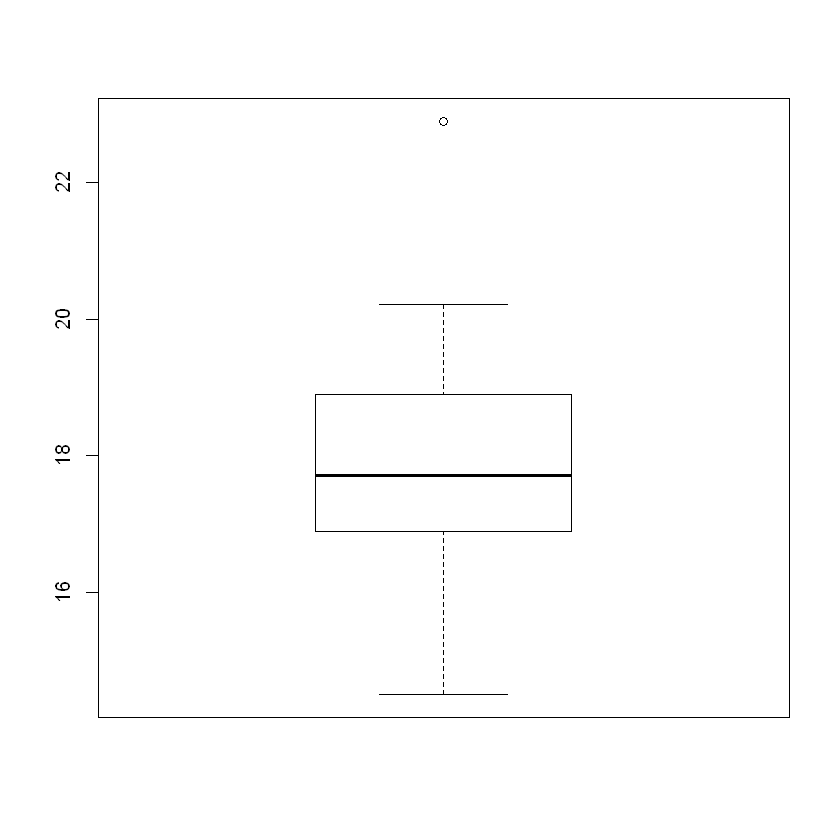

In [6]:
boxplot(qsec) 

con el gráfico de cajas podemos ver un valor muy alejado del último cuartil. Lo cual afirma nuestra teoría previa 

### Medidas de dispersión
Parámetros estadísticos que indican como se alejan los datos respecto de la media aritmética. Sirven como indicador de la variabilidad de los datos. Las medidas de dispersión más utilizadas son el rango, la desviación estándar y la varianza.

In [8]:
#Varianza
var(qsec)

[1] 3.193166

In [9]:
#Desviación estándar 
sd(qsec)

[1] 1.786943

Mientras menor sea la desviación estándar, los datos son más homogéneos, es decir existe menor dispersión, el incremento de los valores de la desviación estándar para el atributo __"qsec"__ indica una mayor variabilidad de los datos.

### Medidas de Forma

In [18]:
#Asimetria
skewness(qsec)

[1] 0.3690453

el resultado es ligeramente mayor a cero, debido al valor que genera una cola a la derecha


In [19]:
#CURTOSIS
kurtosis(qsec)

[1] 0.3351142

La curtosis presenta un ligero pico

*Las medidas de forma las veremos más claro en los siguientes gráficos*

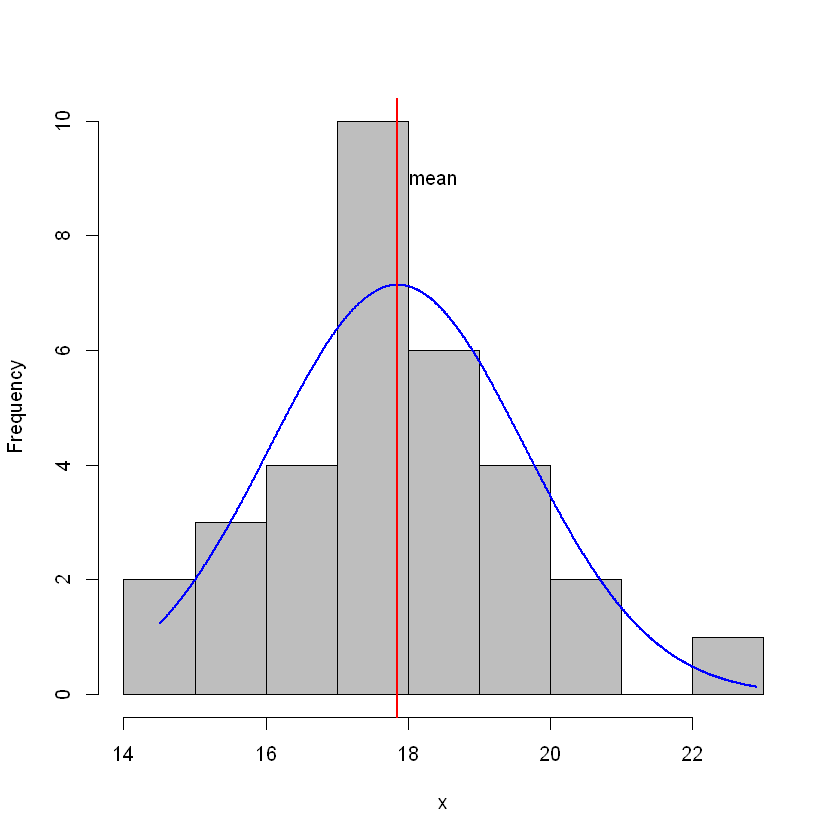

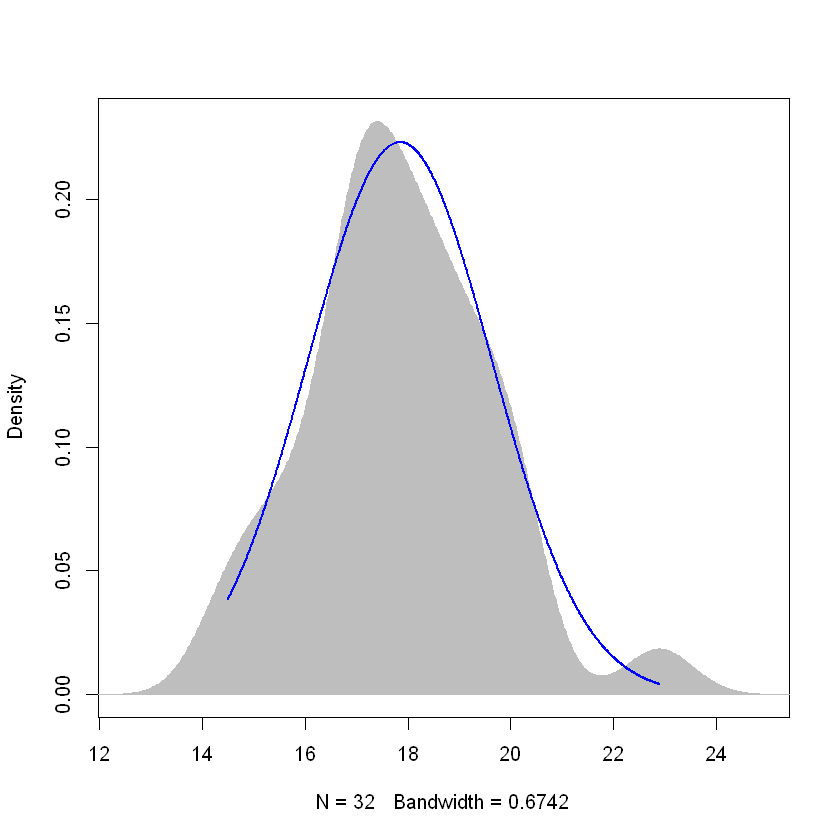

In [20]:
plotNormalHistogram(qsec)
abline(v = mean(qsec), col = "red", lwd = 2)
text(mean(qsec)+0.5, moda(qsec)+7 , "mean", cex = 1)
plotNormalDensity(qsec)


Un histograma debe ser aproximadamente normal, sin sesgo excesivo o curtosis. Agregar una curva normal con la misma media y desviación estándar que los datos ayuda a evaluar el histograma.

se puede ver la cola a la derecha y el apelotonamiento de datos que pasan ligeramente la normal

#### 2. Implementar un modelo de regresión utilizando las variables disp y wt, donde disp será la variable respuesta y wt la variable explicativa. Hay que comentar los resultados obtenidos y apoyarlos sobre gráficos.

In [10]:

head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


* __disp	*Displacement (cu.in.)*__	Displacement measures overall volume in the engine as a factor of cylinder circumfrance, depth and total number of cylinders. This metric gives a good proxy for the total amount of power the engine can generate.
* __wt	*Weight (lb/1000)*__	The overall weight of the vehicle per 1000lbs (half US ton).

In [18]:
datosCars <- mtcars %>% select(disp,wt) 
str(datosCars)
summary(datosCars)
moda(datosCars$disp)

'data.frame':	32 obs. of  2 variables:
 $ disp: num  160 160 108 258 360 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...


      disp             wt       
 Min.   : 71.1   Min.   :1.513  
 1st Qu.:120.8   1st Qu.:2.581  
 Median :196.3   Median :3.325  
 Mean   :230.7   Mean   :3.217  
 3rd Qu.:326.0   3rd Qu.:3.610  
 Max.   :472.0   Max.   :5.424  

275.8 
    3

para el atributo disp los valores de la media y la mediana son distantes.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


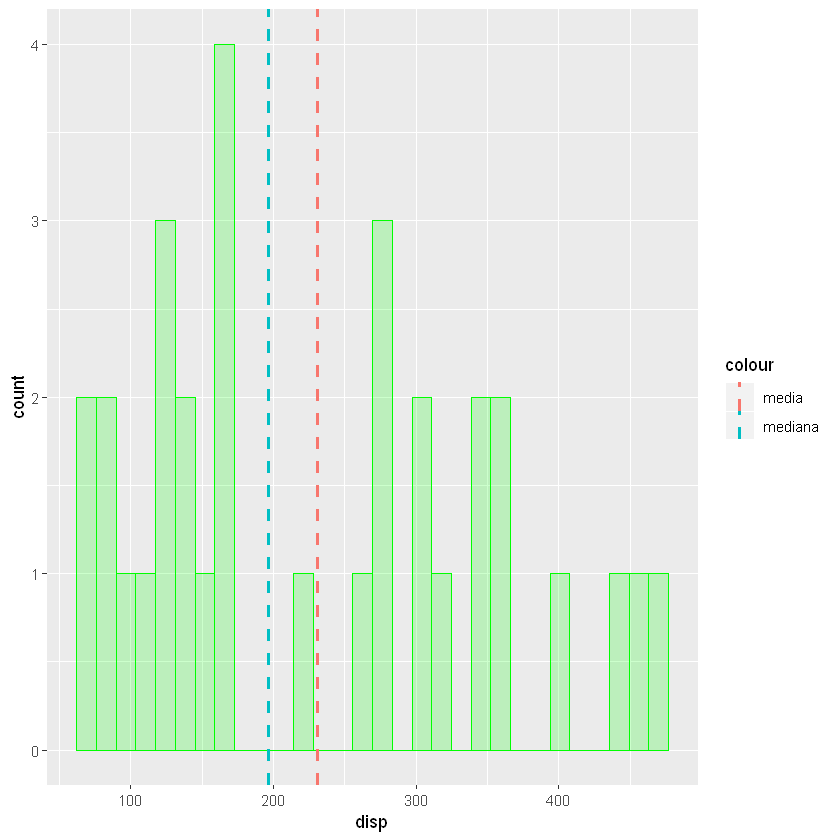

In [14]:
hg <- ggplot(aes(x = disp), data = datosCars) + 
        geom_histogram(color = 'green', fill = 'green', alpha = 0.2)+ geom_vline(
    aes(xintercept=median(disp), color="mediana"), 
    linetype="dashed",
    size=1
)+ geom_vline(
    aes(xintercept=mean(disp), color="media"), 
    linetype="dashed",
    size=1
)
hg

con el histograma podemos ver la separación entre media y mediana

In [29]:
#transformar datos

datosCars['disp_sqrt'] <- sqrt(datosCars$disp)

head(datosCars)


,disp,wt,disp_sqrt
Mazda RX4,160,2.620,12.64911
Mazda RX4 Wag,160,2.875,12.64911
Datsun 710,108,2.320,10.39230
Hornet 4 Drive,258,3.215,16.06238
Hornet Sportabout,360,3.440,18.97367
Valiant,225,3.460,15.00000


normalizamos los datos mediante la raiz para el atributo disp

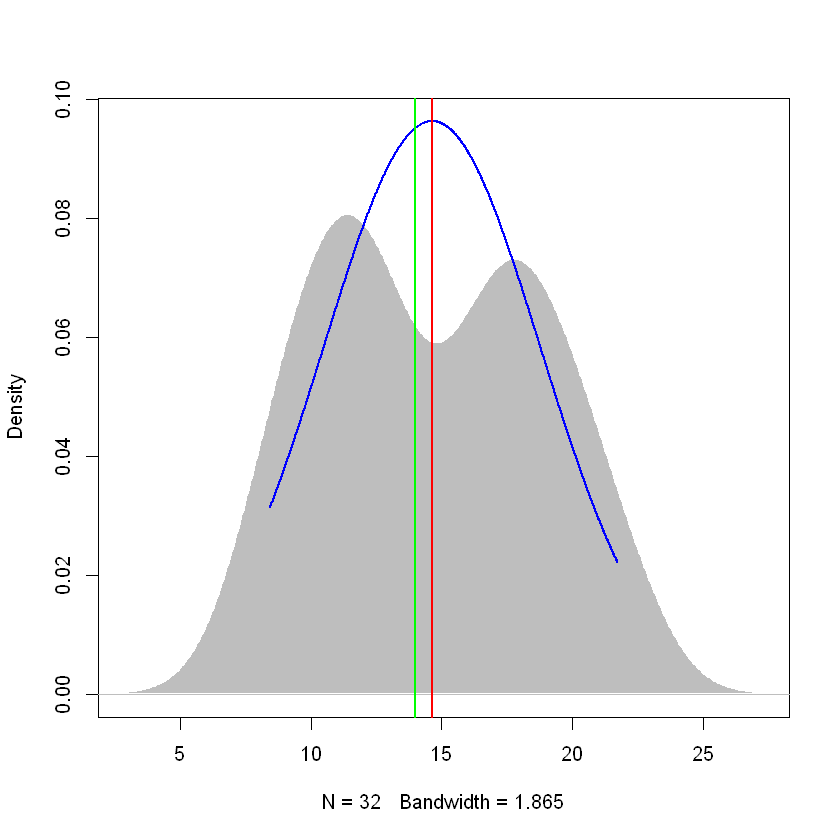

In [31]:
plotNormalDensity(datosCars$disp_sqrt)
abline(v = mean(datosCars$disp_sqrt), col = "red", lwd = 2)
abline(v = median(datosCars$disp_sqrt), col = "green", lwd = 2)

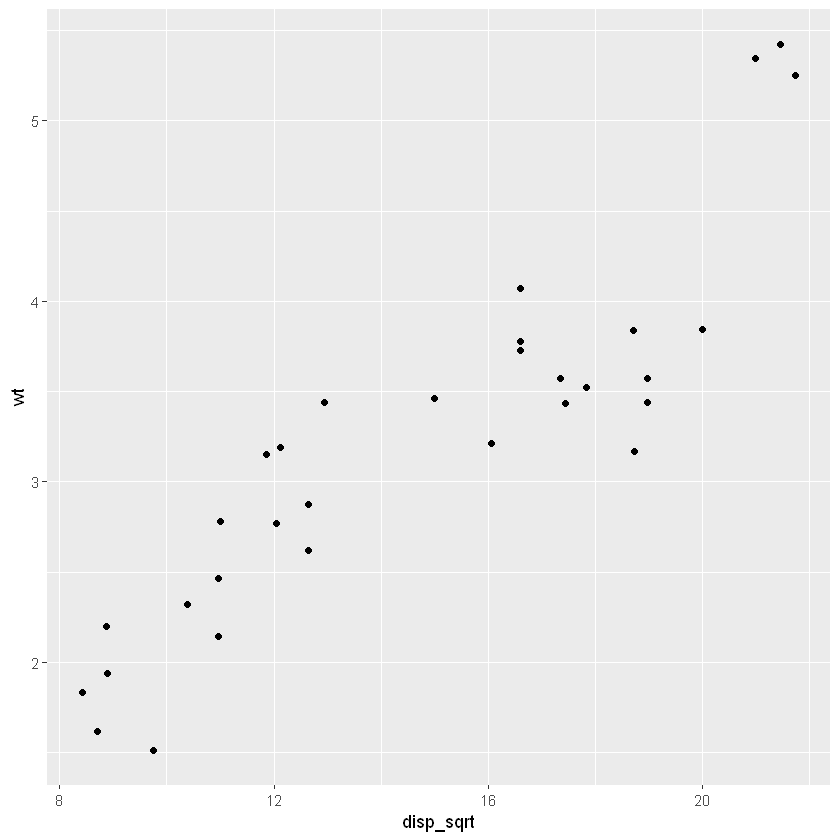

In [34]:
plot <- ggplot(datosCars, aes(x=disp_sqrt, y=wt)) + geom_point()
plot

In [35]:
# implementar modelo de regreción

regresion <- lm(disp_sqrt ~ wt, data = datosCars)

In [36]:
summary(regresion)


Call:
lm(formula = disp_sqrt ~ wt, data = datosCars)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5251 -1.3037 -0.5566  1.4651  4.2813 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.5072     1.1847   2.116   0.0427 *  
wt            3.7686     0.3528  10.683 9.62e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.922 on 30 degrees of freedom
Multiple R-squared:  0.7918,	Adjusted R-squared:  0.7849 
F-statistic: 114.1 on 1 and 30 DF,  p-value: 9.617e-12


In [39]:
shapiro.test(regresion$residuals)


	Shapiro-Wilk normality test

data:  regresion$residuals
W = 0.93969, p-value = 0.07337


* Se tiene que p > 0.05 por lo tamto nos indiaca que tenemos una distribución normal

In [43]:
# Dado un vector se dibuja el histograma asociado y la distribución normal
 
plotn <- function(x,main="Histograma de frecuencias \ny distribución normal",
                  xlab="X",ylab="Densidad") {
                  min <- min(x)
                  max <- max(x)
                  media <- mean(x)
                  dt <- sd(x)
                  hist(x,freq=F,main=main,xlab=xlab,ylab=ylab)
                  curve(dnorm(x,media,dt), min, max,add = T,col="blue")
                }

lo podemos ver en el siguiente gráfico

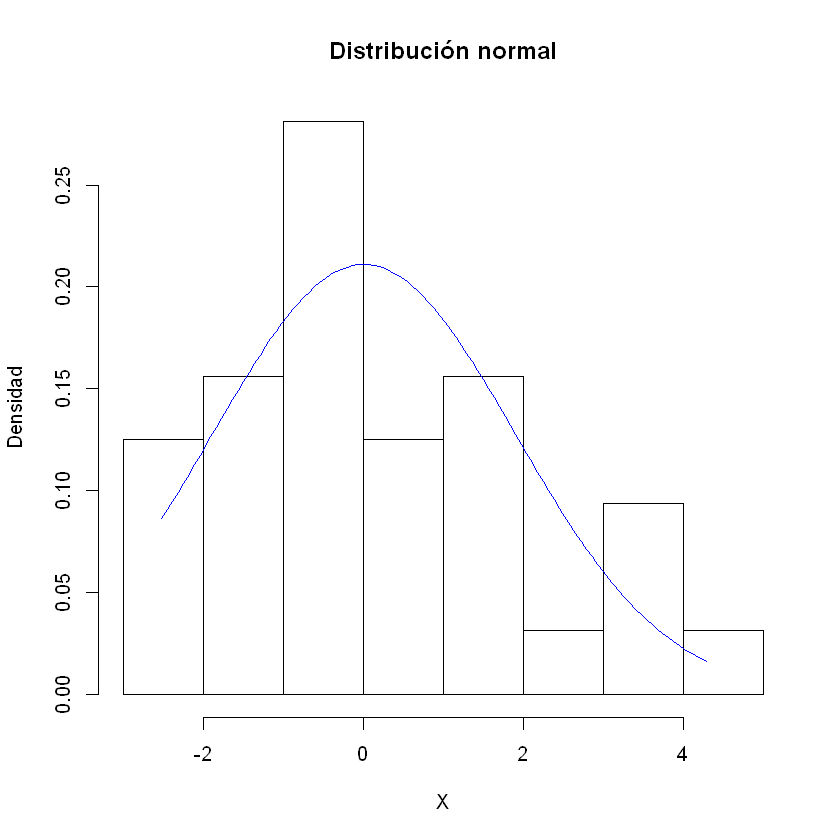

In [41]:
plotn(regresion$residuals,main="Distribución normal")

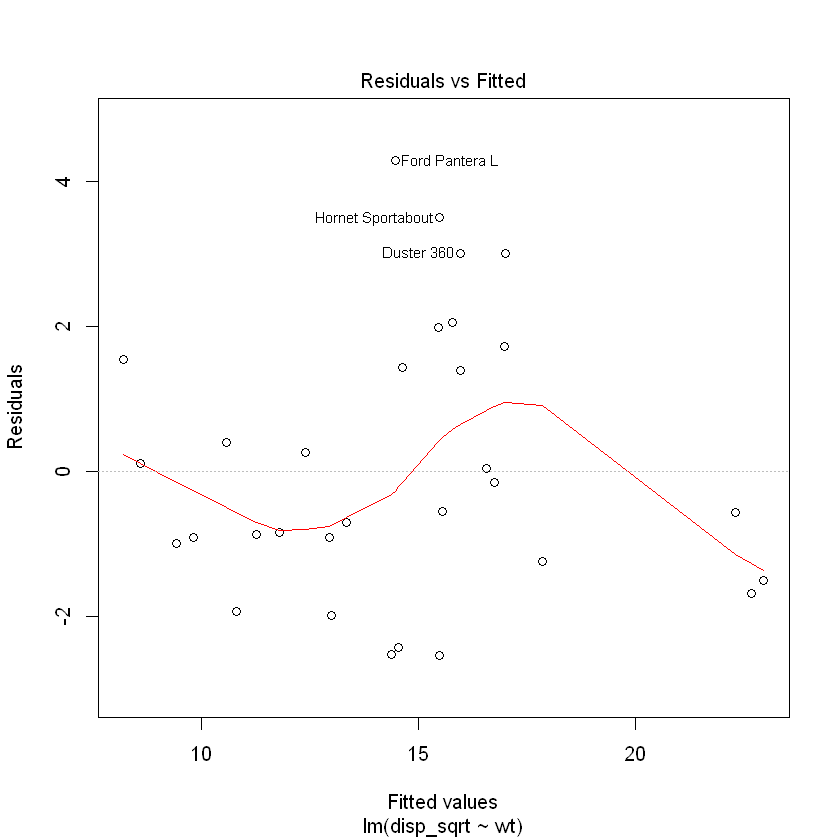

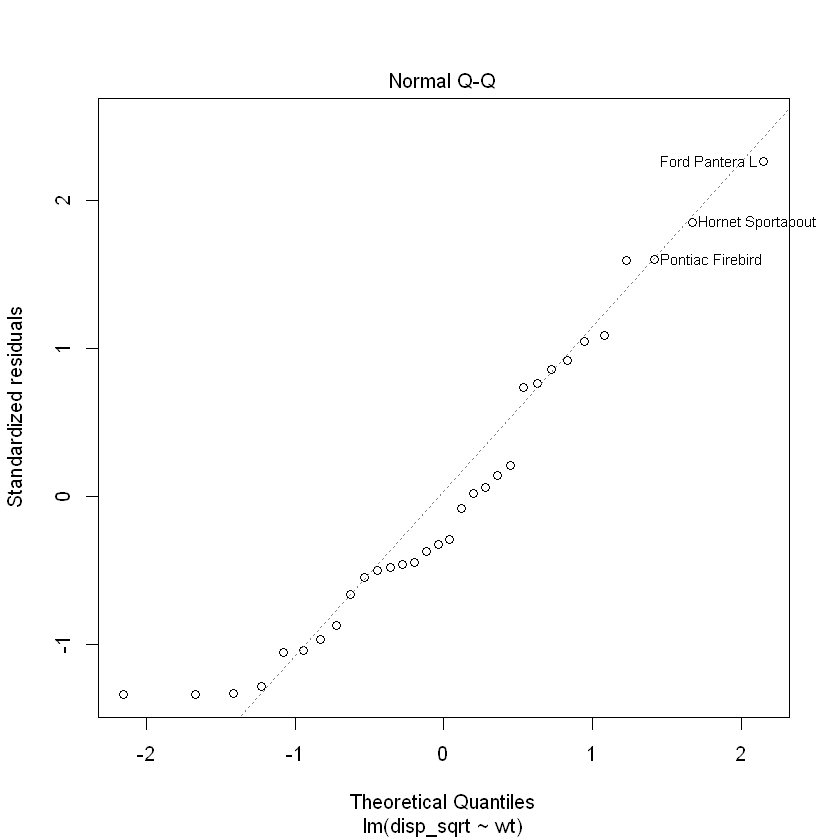

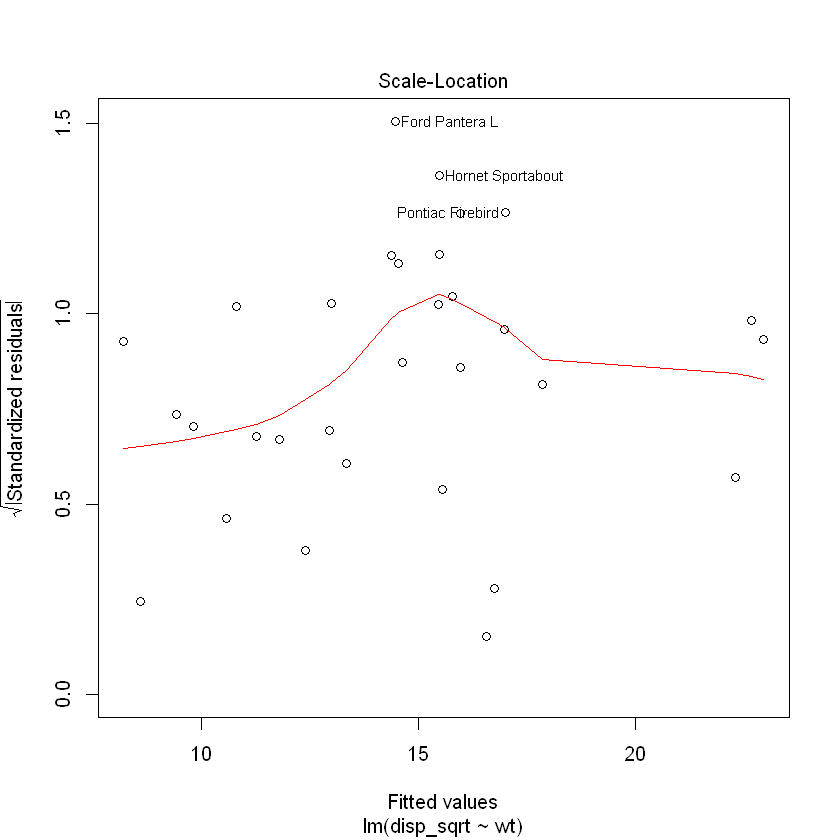

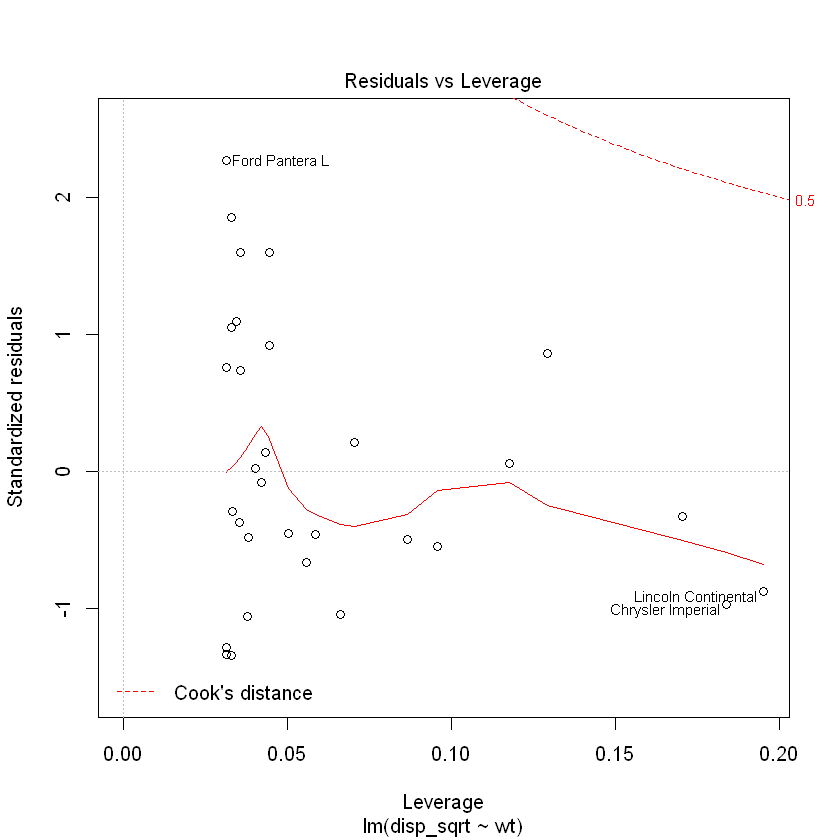

In [38]:
#pintar la regresion
plot(regresion)

los valores de la regresión son confiables.
* no tenemos un apalancamiento notorio.
* hay linealidad y normalidad
* la homocedasticidad es constante, no es creciente

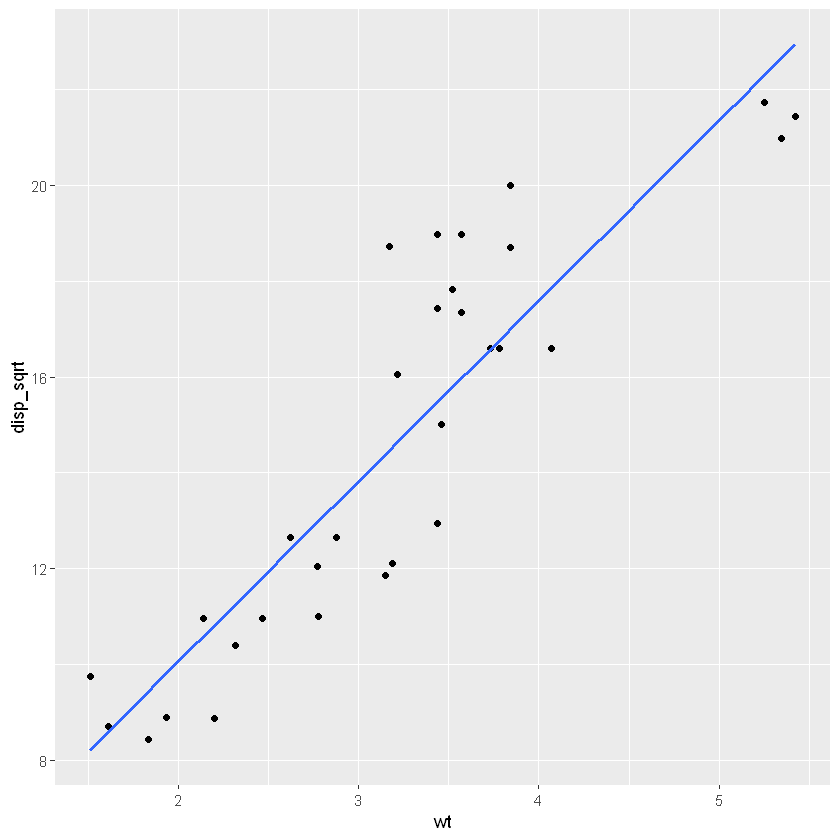

In [51]:
plot + geom_smooth(method = "lm", se = FALSE)

visualizamos el modelo con ggplot2, vemos un modelo confiable

#### 3- Implementar un modelo de regresión utilizando las variables disp, wt y hp, donde disp será la variable respuesta y wt y hp las variables explicativas. Hay que comentar los resultados obtenidos y apoyarlos sobre gráficos

In [53]:
datosCars2 <- mtcars %>% select(disp,wt,hp) 
str(datosCars2)
summary(datosCars2)

'data.frame':	32 obs. of  3 variables:
 $ disp: num  160 160 108 258 360 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...


      disp             wt              hp       
 Min.   : 71.1   Min.   :1.513   Min.   : 52.0  
 1st Qu.:120.8   1st Qu.:2.581   1st Qu.: 96.5  
 Median :196.3   Median :3.325   Median :123.0  
 Mean   :230.7   Mean   :3.217   Mean   :146.7  
 3rd Qu.:326.0   3rd Qu.:3.610   3rd Qu.:180.0  
 Max.   :472.0   Max.   :5.424   Max.   :335.0  

In [54]:
# implementar modelo de regreción

regresion2 <- lm(disp ~ wt + hp, data = datosCars2)
summary(regresion2)


Call:
lm(formula = disp ~ wt + hp, data = datosCars2)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.565 -23.802   2.111  35.731  99.107 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -129.9506    29.1890  -4.452 0.000116 ***
wt            82.1125    11.5518   7.108 8.04e-08 ***
hp             0.6578     0.1649   3.990 0.000411 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 47.35 on 29 degrees of freedom
Multiple R-squared:  0.8635,	Adjusted R-squared:  0.8541 
F-statistic: 91.71 on 2 and 29 DF,  p-value: 2.889e-13


los Coefficients nos indican que las variables son adecuadas

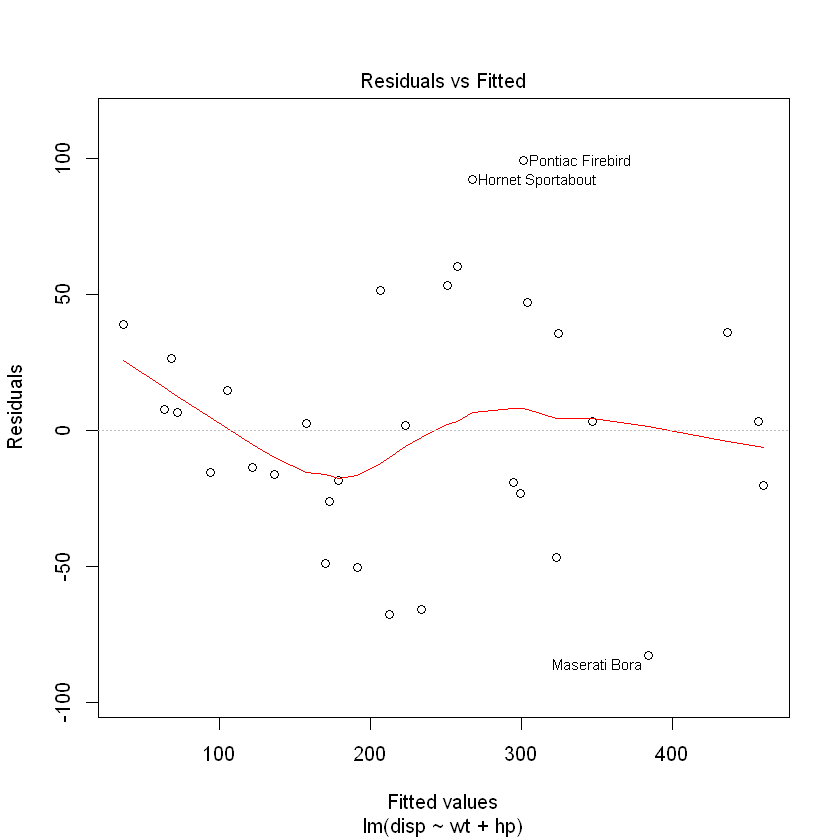

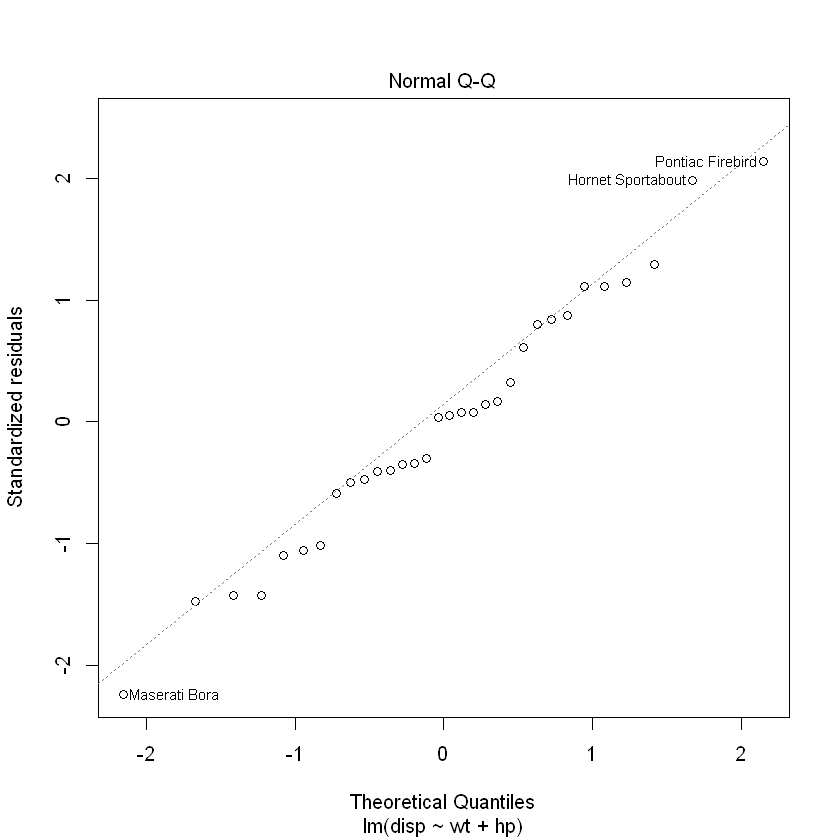

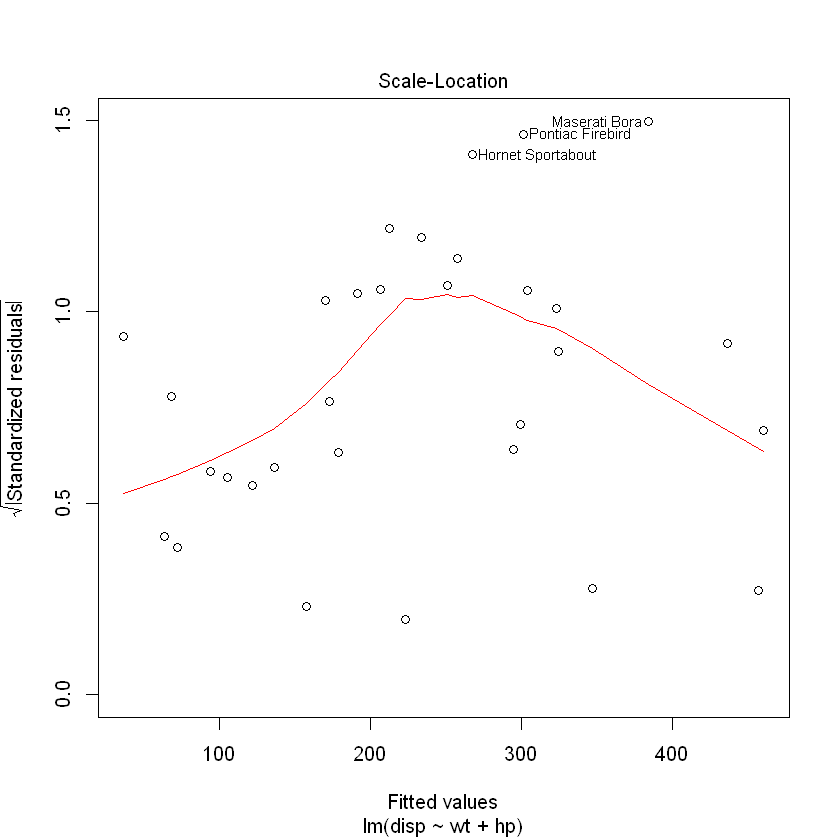

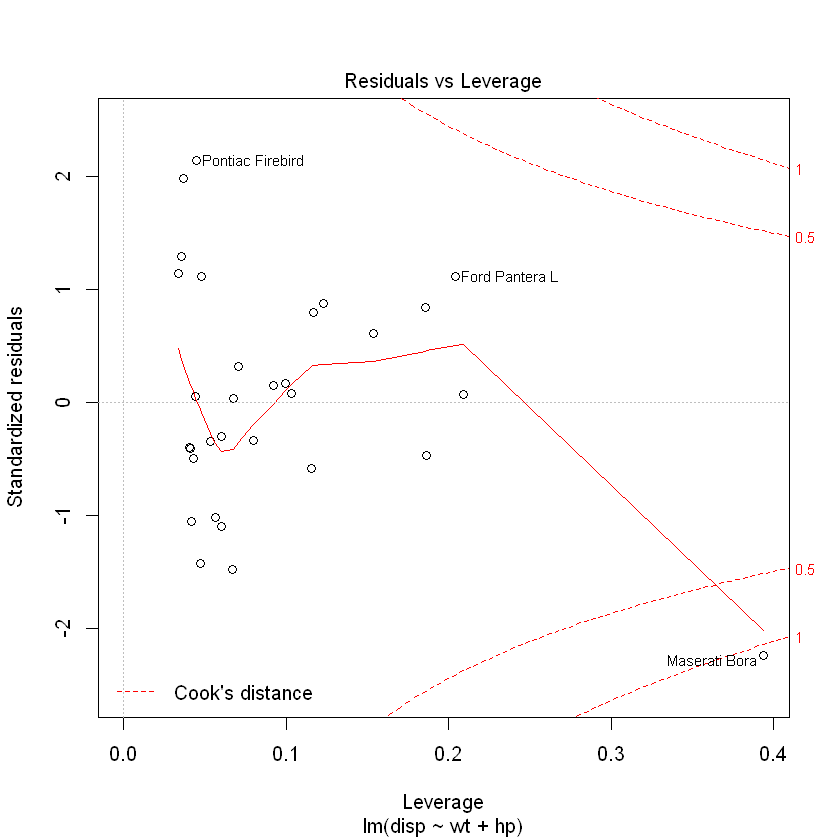

In [55]:
plot(regresion2)